### 1. Exploratory Data Analysis (EDA) and Data Cleaning
   - **Statistical Analysis**: Conduct correlation analysis and descriptive statistics to understand data relationships and distributions.
   - **Visualization**: Create distribution visualizations to get a sense of the data spread and potential outliers.
   - **Outlier Handling**: Identify and remove or adjust outliers in the dataset.
   - **Missing Values**: Implement strategies for imputing missing values.

### 2. Feature Engineering
   - **Feature Scaling/Normalization**: Standardize the range of continuous input variables.
   - **Feature Selection**: Based on EDA, select relevant features that influence depreciation.
   - **Categorical Variable Encoding**: Convert categorical variables into a format that can be provided to ML models.
   - **Feature Transformation**: Transform features if needed to improve model performance.
   - **New Feature Creation**: Consider creating new features that might better capture the patterns in the data.

### 3. Datasets Generation
   - **Splitting Data**: Divide the dataset into training, validation, and test sets.

### 4. Model Fitting
   - **Random Forest and Neural Network Implementation**: Fit both models to the training data.
   - **Hyperparameter Tuning**: Use grid-search to fine-tune the models.
   - **Training Analysis**: Plot the loss function of the neural network over epochs and analyze the performance.

### 5. Model Evaluation
   - **Performance Metrics**: Evaluate models using metrics like MAE, RMSE, or others suitable for regression.
   - **Interpretability**: Ensure the chosen metrics are understandable to non-technical stakeholders.
   - **Detailed Analysis**: Create plot (actual vs. predicted) to understand model performance in depth.

### 6. Model Selection
   - **Performance Comparison**: Compare the random forest and neural network models based on the evaluation metrics.
   - **Best Model Identification**: Decide which model performs better for predicting car depreciation.

### 7. Model Explainability
   - **Feature Importance Analysis**: We will use Random Forest Feature Importance Method.

### 8. Other Models
   - **Linear Regression**: Implement linear regression and evaluate models using metrics like MAE, RMSE.
   - **KNN Model**: Implement KNN and evaluate models using metrics like MAE, RMSE.
   - **XGBoost**: Implement XGBoost and evaluate models using metrics like MAE, RMSE.
### Main Question
   - **What are the key predictors of a movie's financial success?**

### Sub-questions Analysis
   - **Audiance Reception(userscore) based on genre, budget, and critical reception**: .
   - **based on pre released variables, predict predict success of sales**
   


In [35]:
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback
from tensorflow.keras.optimizers import Adam
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from kneed import KneeLocator
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import shap
import plotly.figure_factory as ff
import plotly.io as pio

#### Exploratory Data Analysis (EDA) and Data Cleaning and creating new dataset

In [38]:
sales_df = pd.read_csv('sales.csv',encoding='ISO-8859-1')
movies_df = pd.read_csv('movie.csv',encoding='ISO-8859-1')
#combine two datasets
df = pd.merge(movies_df, sales_df, left_on='title', right_on='title', how='inner')
df.head()

url_x                title  \
0  https://www.metacritic.com/movie/10-cloverfiel...  10 Cloverfield Lane   
1          https://www.metacritic.com/movie/10-years             10 Years   
2  https://www.metacritic.com/movie/100-bloody-acres     100 Bloody Acres   
3       https://www.metacritic.com/movie/100-streets          100 Streets   
4        https://www.metacritic.com/movie/1001-grams           1001 Grams   

                     studio       rating  runtime_x  \
0        Paramount Pictures      | PG-13      104.0   
1  Anchor Bay Entertainment          | R      100.0   
2           Music Box Films  | Not Rated       91.0   
3      Samuel Goldwyn Films          NaN       93.0   
4               Kino Lorber  | Not Rated       93.0   

                                                cast          director  \
0  John Gallagher Jr.,John Goodman,Mary Elizabeth...  Dan Trachtenberg   
1             Channing Tatum,Chris Pratt,Jenna Dewan      Jamie Linden   
2                                                NaN   Cameron Cairnes   
3                                                NaN      Jim O'Hanlon   
4                                                NaN        Bent Hamer   

                                       genre_x  \
0  Action,Sci-Fi,Drama,Mystery,Thriller,Horror   
1                         Drama,Comedy,Romance   
2                                Horror,Comedy   
3                                        Drama   
4                                        Drama   

                                             summary  \
0  Waking up from a car accident, a young woman (...   
1                                                NaN   
2  Reg and Lindsay run an organic fertilizer busi...   
3                                                NaN   
4  When Norwegian scientist Marie attends a semin...   

                                              awards  ...  \
0  #18MostDiscussedMovieof2016 , #1MostSharedMovi...  ...   
1                                                NaN  ...   
2                                                NaN  ...   
3                                                NaN  ...   
4                                                NaN  ...   

   worldwide_box_office  production_budget Unnamed: 8 opening_weekend  \
0           108286422.0         15000000.0        NaN      24727437.0   
1              987640.0                NaN        NaN         22707.0   
2                   NaN                NaN        NaN          3419.0   
3                 307.0                NaN        NaN             NaN   
4               47019.0                NaN        NaN             NaN   

   theatre_count  avg run per theatre  runtime_y          keywords  \
0         3391.0                  4.9      103.0            Kidnap   
1            3.0                  2.1      100.0          Ensemble   
2           13.0                  1.5       91.0  Accidental Death   
3            NaN                  NaN       93.0          Ensemble   
4            NaN                  NaN       88.0      Set in Paris   

          creative_type                                              url_y  
0  Contemporary Fiction  https://www.the-numbers.com/movie/10-Cloverfie...  
1  Contemporary Fiction         https://www.the-numbers.com/movie/10-Years  
2  Contemporary Fiction  https://www.the-numbers.com/movie/100-Bloody-A...  
3  Contemporary Fiction  https://www.the-numbers.com/movie/100-Streets-...  
4  Contemporary Fiction       https://www.the-numbers.com/movie/1001-Grams  

[5 rows x 31 columns]

In [39]:
# Function to convert genre column to numeric column in dataset
def extract_primary_genre(genre_str):
    return genre_str.split(',')[0] if pd.notna(genre_str) else None

# Apply the function to create a new column for the primary genre
df['primary_genre'] = df['genre_x'].apply(extract_primary_genre)

# Create a numeric encoding for the primary genre
primary_genre_mapping = {genre: index for index, genre in enumerate(df['primary_genre'].unique())}
df['genre_numeric'] = df['primary_genre'].map(primary_genre_mapping)

In [40]:
# Function to convert rating column to numeric column in dataset
def extract_rating(rating_str):
    return rating_str.split(',')[0] if pd.notna(rating_str) else None

# Apply the function to create a new column for the rating
df['rating'] = df['rating'].apply(extract_rating)

# Create a numeric encoding for the rating
rating_mapping = {rating: index for index, rating in enumerate(df['rating'].unique())}
df['rating_number'] = df['rating'].map(rating_mapping)

####  Calculating Descriptive Statistics for the DataFrame

In [41]:
summary_statistics = df.describe()
summary_statistics

runtime_x    metascore    userscore  genre_numeric  \
count  8815.000000  8990.000000  7586.000000    8990.000000   
mean    102.403744    56.785873     6.508067       3.524472   
std      18.380524    17.079414     1.386632       3.881865   
min      30.000000     1.000000     0.300000       0.000000   
25%      91.000000    45.000000     5.700000       1.000000   
50%      99.000000    58.000000     6.700000       1.000000   
75%     111.000000    70.000000     7.500000       6.000000   
max     808.000000   100.000000     9.700000      21.000000   

       genre_combination_numeric         year  international_box_office  \
count                8990.000000  8990.000000              5.824000e+03   
mean                  179.916352  2011.161402              4.121961e+07   
std                   281.854595     6.078608              1.104586e+08   
min                     0.000000  2000.000000              1.200000e+01   
25%                     6.000000  2006.000000              2.567505e+05   
50%                    47.000000  2012.000000              3.665654e+06   
75%                   225.000000  2016.000000              2.957772e+07   
max                  1312.000000  2021.000000              2.085392e+09   

       domestic_box_office  worldwide_box_office  production_budget  \
count         7.338000e+03          5.824000e+03       3.672000e+03   
mean          2.520134e+07          7.248832e+07       3.972714e+07   
std           5.870682e+07          1.699726e+08       4.722943e+07   
min           1.290000e+02          1.200000e+01       7.000000e+03   
25%           7.149650e+04          7.733372e+05       9.000000e+06   
50%           1.076830e+06          1.049692e+07       2.300000e+07   
75%           2.502847e+07          6.515714e+07       5.000000e+07   
max           8.583730e+08          2.845900e+09       4.000000e+08   

       Unnamed: 8  opening_weekend  theatre_count  avg run per theatre  \
count         0.0     7.009000e+03    7027.000000          7023.000000   
mean          NaN     7.645947e+06    1021.499787             4.441193   
std           NaN     1.855684e+07    1384.150765             3.008053   
min           NaN     4.700000e+01       1.000000             0.000000   
25%           NaN     1.341500e+04       2.000000             2.500000   
50%           NaN     9.827400e+04      15.000000             3.900000   
75%           NaN     8.175198e+06    2436.500000             5.800000   
max           NaN     3.571150e+08    4725.000000            76.200000   

         runtime_y  rating_number  
count  7240.000000    8990.000000  
mean    102.915608       2.057397  
std      18.841885       2.273109  
min      11.000000       0.000000  
25%      91.000000       1.000000  
50%     100.000000       1.000000  
75%     111.000000       2.000000  
max     803.000000      17.000000

#### Identifying Missing Values in Each DataFrame Column

In [42]:
# Check for Missing Values
missing_values = df.isna().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 url_x                           0
title                           0
studio                        222
rating                        633
runtime_x                     175
cast                         2591
director                        9
genre_x                        11
summary                      4616
awards                       5419
metascore                       0
userscore                    1404
RelDate                         0
primary_genre                  11
genre_numeric                   0
genre_combination_numeric       0
year                            0
release_date                    0
genre_y                       389
international_box_office     3166
domestic_box_office          1652
worldwide_box_office         3166
production_budget            5318
Unnamed: 8                   8990
opening_weekend              1981
theatre_count                1963
avg run per theatre          1967
runtime_y                    1750
keywords        

#### Missing Values with Median for Numerical Columns and Mode for Categorical Columns






In [43]:
# Handling Missing Values
for col in df.select_dtypes(include=['float64', 'int64']):
    df[col].fillna(df[col].median(), inplace=True)
# For Categorical Columns
for col in df.select_dtypes(include=['object', 'category']):
    df[col].fillna(df[col].mode()[0], inplace=True)

#### Rechecking for Missing Values Post-Imputation






In [44]:
# Check again for Missing Values
missing_values = df.isna().sum()
print("Missing values in each column:\n", missing_values)


Missing values in each column:
 url_x                           0
title                           0
studio                          0
rating                          0
runtime_x                       0
cast                            0
director                        0
genre_x                         0
summary                         0
awards                          0
metascore                       0
userscore                       0
RelDate                         0
primary_genre                   0
genre_numeric                   0
genre_combination_numeric       0
year                            0
release_date                    0
genre_y                         0
international_box_office        0
domestic_box_office             0
worldwide_box_office            0
production_budget               0
Unnamed: 8                   8990
opening_weekend                 0
theatre_count                   0
avg run per theatre             0
runtime_y                       0
keywords        

#### new feature Creation for better analysis

In [45]:
df['benefit'] = df['worldwide_box_office'] - df['production_budget']

In [46]:
df.head()

url_x                title  \
0  https://www.metacritic.com/movie/10-cloverfiel...  10 Cloverfield Lane   
1          https://www.metacritic.com/movie/10-years             10 Years   
2  https://www.metacritic.com/movie/100-bloody-acres     100 Bloody Acres   
3       https://www.metacritic.com/movie/100-streets          100 Streets   
4        https://www.metacritic.com/movie/1001-grams           1001 Grams   

                     studio       rating  runtime_x  \
0        Paramount Pictures      | PG-13      104.0   
1  Anchor Bay Entertainment          | R      100.0   
2           Music Box Films  | Not Rated       91.0   
3      Samuel Goldwyn Films          | R       93.0   
4               Kino Lorber  | Not Rated       93.0   

                                                cast          director  \
0  John Gallagher Jr.,John Goodman,Mary Elizabeth...  Dan Trachtenberg   
1             Channing Tatum,Chris Pratt,Jenna Dewan      Jamie Linden   
2  Astrid Roos,Barbara Hellemans,Daphn?? Huynh,Gu...   Cameron Cairnes   
3  Astrid Roos,Barbara Hellemans,Daphn?? Huynh,Gu...      Jim O'Hanlon   
4  Astrid Roos,Barbara Hellemans,Daphn?? Huynh,Gu...        Bent Hamer   

                                       genre_x  \
0  Action,Sci-Fi,Drama,Mystery,Thriller,Horror   
1                         Drama,Comedy,Romance   
2                                Horror,Comedy   
3                                        Drama   
4                                        Drama   

                                             summary  \
0  Waking up from a car accident, a young woman (...   
1  A mother (Helen Hunt) travels cross-country to...   
2  Reg and Lindsay run an organic fertilizer busi...   
3  A mother (Helen Hunt) travels cross-country to...   
4  When Norwegian scientist Marie attends a semin...   

                                              awards  ...  Unnamed: 8  \
0  #18MostDiscussedMovieof2016 , #1MostSharedMovi...  ...         NaN   
1                        #66MostDiscussedMovieof2019  ...         NaN   
2                        #66MostDiscussedMovieof2019  ...         NaN   
3                        #66MostDiscussedMovieof2019  ...         NaN   
4                        #66MostDiscussedMovieof2019  ...         NaN   

   opening_weekend theatre_count avg run per theatre  runtime_y  \
0       24727437.0        3391.0                 4.9      103.0   
1          22707.0           3.0                 2.1      100.0   
2           3419.0          13.0                 1.5       91.0   
3          98274.0          15.0                 3.9       93.0   
4          98274.0          15.0                 3.9       88.0   

           keywords         creative_type  \
0            Kidnap  Contemporary Fiction   
1          Ensemble  Contemporary Fiction   
2  Accidental Death  Contemporary Fiction   
3          Ensemble  Contemporary Fiction   
4      Set in Paris  Contemporary Fiction   

                                               url_y rating_number     benefit  
0  https://www.the-numbers.com/movie/10-Cloverfie...             0  93286422.0  
1         https://www.the-numbers.com/movie/10-Years             1 -22012360.0  
2  https://www.the-numbers.com/movie/100-Bloody-A...             2 -12503082.0  
3  https://www.the-numbers.com/movie/100-Streets-...             3 -22999693.0  
4       https://www.the-numbers.com/movie/1001-Grams             2 -22952981.0  

[5 rows x 33 columns]

#### Calculating and Visualizing the Average 'benefit' by 'primary_genre' in Descending Order






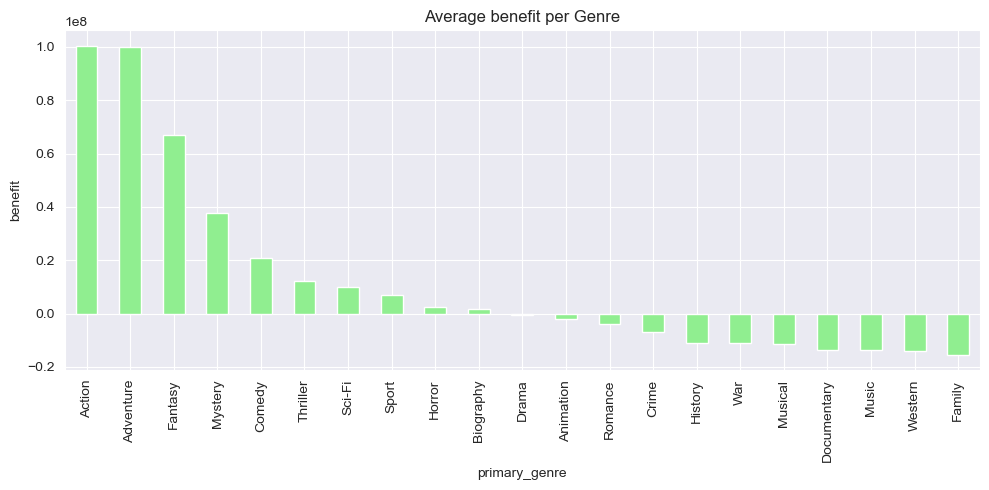

In [47]:
# Calculate mean and sort of genre
benefit = df.groupby('primary_genre')['benefit'].mean().sort_values(ascending=False)
benefit.plot(kind='bar', figsize=(10, 5), color='lightgreen')
plt.title('Average benefit per Genre')
plt.ylabel('benefit')
plt.tight_layout()
plt.show()

#### Plotting and Comparing 'benefit' and 'production_budget' Trends Across the Dataset






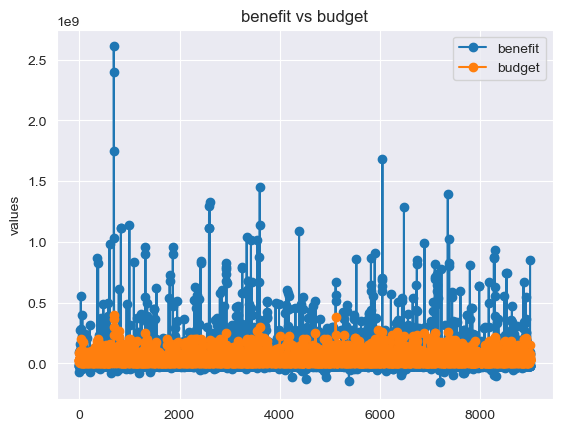

In [48]:
# Calculate mean and sort of genre
budget = df['production_budget']
bene = df['benefit']
plt.plot(bene,marker='o', linestyle='-', label='benefit')
plt.plot(budget,marker='o', linestyle='-', label='budget')
plt.title('benefit vs budget')
plt.ylabel('values')
plt.grid(True)
plt.legend()
plt.show()

In [49]:
numerical_features = ['rating_number','metascore','userscore','genre_numeric','production_budget','theatre_count','worldwide_box_office','domestic_box_office','international_box_office','benefit']

#### Detecting Outliers Using the Interquartile Range (IQR) Method






In [50]:
# Outliers Detection and Handling
# We will use the IQR method to detect and handle outliers
Q1 = df[numerical_features].quantile(0.25)
Q3 = df[numerical_features].quantile(0.75)
IQR = Q3 - Q1

In [51]:
# Defining the outlier range
outlier_range = 1.5 * IQR

#### Filtering Outliers Based on Calculated Lower and Upper Bounds Using IQR Method






In [52]:
# Filtering out the outliers
outliers_lower = (df[numerical_features] < (Q1 - outlier_range))
outliers_upper = (df[numerical_features] > (Q3 + outlier_range))

In [53]:
# Check again for Missing Values
missing_values = df.isna().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 url_x                           0
title                           0
studio                          0
rating                          0
runtime_x                       0
cast                            0
director                        0
genre_x                         0
summary                         0
awards                          0
metascore                       0
userscore                       0
RelDate                         0
primary_genre                   0
genre_numeric                   0
genre_combination_numeric       0
year                            0
release_date                    0
genre_y                         0
international_box_office        0
domestic_box_office             0
worldwide_box_office            0
production_budget               0
Unnamed: 8                   8990
opening_weekend                 0
theatre_count                   0
avg run per theatre             0
runtime_y                       0
keywords        

In [54]:
df[numerical_features].head()

rating_number  metascore  userscore  genre_numeric  production_budget  \
0              0         76        7.7              0         15000000.0   
1              1         61        6.9              1         23000000.0   
2              2         63        7.5              2         23000000.0   
3              3         44        6.1              1         23000000.0   
4              2         65        6.7              1         23000000.0   

   theatre_count  worldwide_box_office  domestic_box_office  \
0         3391.0           108286422.0           72082999.0   
1            3.0              987640.0             203654.0   
2           13.0            10496918.0               6388.0   
3           15.0                 307.0            1076829.5   
4           15.0               47019.0              10983.0   

   international_box_office     benefit  
0                36203423.0  93286422.0  
1                  783986.0 -22012360.0  
2                 3665654.0 -12503082.0  
3                     307.0 -22999693.0  
4                   36036.0 -22952981.0


#### Creating and Displaying Correlation Matrix for the features

                          rating_number  metascore  userscore  genre_numeric  \
rating_number                  1.000000   0.084630   0.024380       0.180670   
metascore                      0.084630   1.000000   0.467715       0.132568   
userscore                      0.024380   0.467715   1.000000       0.029343   
genre_numeric                  0.180670   0.132568   0.029343       1.000000   
production_budget              0.017613  -0.033885   0.002422      -0.075679   
theatre_count                 -0.009958  -0.246410  -0.103553      -0.073380   
worldwide_box_office           0.012791   0.027876   0.061150      -0.059250   
domestic_box_office            0.010049   0.018975   0.066402      -0.059471   
international_box_office       0.010971   0.029959   0.054718      -0.059863   
benefit                        0.010528   0.042150   0.072066      -0.050339   

                          production_budget  theatre_count  \
rating_number                      0.017613      -0.00995

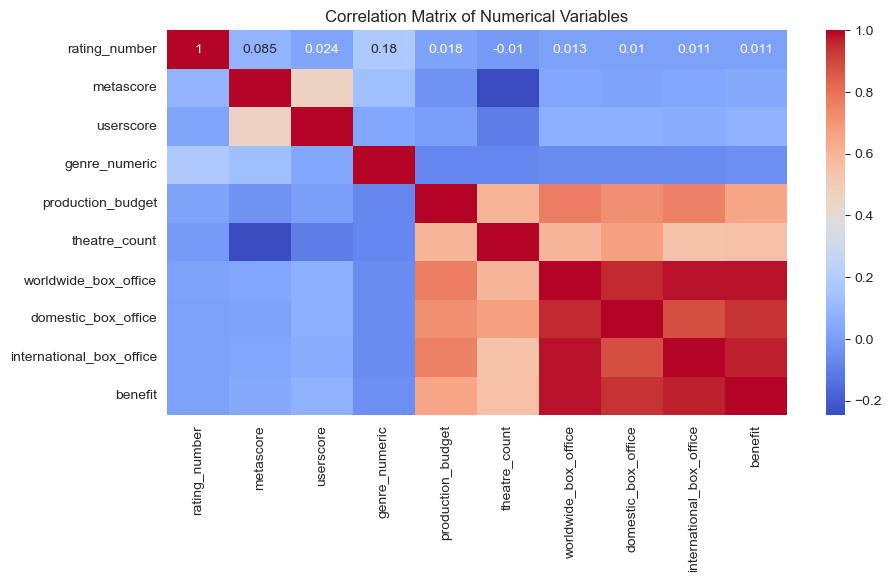

In [56]:
# Plotting the correlation matrix
plt.figure(figsize=(10, 5))
correlation_matrix = df[numerical_features].corr()
print(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')  
plt.title("Correlation Matrix of Numerical Variables")
plt.show()

#### Standardizing Numerical Data and Converting Back to DataFrame with Original Column Names

In [139]:
# Standardizing the data
scaler = StandardScaler()
numerical_data = df[numerical_features]
scaled_data = scaler.fit_transform(numerical_data)
scaled_data=pd.DataFrame(scaled_data,columns=['rating_number','metascore','userscore','genre_numeric','production_budget','theatre_count','worldwide_box_office','domestic_box_office','international_box_office','benefit'])
print(scaled_data.head())

   rating_number  metascore  userscore  genre_numeric  production_budget  \
0      -0.905153   1.125050   0.910924      -0.907983          -0.474172   
1      -0.465202   0.246751   0.283759      -0.650361          -0.218420   
2      -0.025252   0.363857   0.754133      -0.392738          -0.218420   
3       0.414699  -0.748655  -0.343406      -0.650361          -0.218420   
4      -0.025252   0.480964   0.126968      -0.650361          -0.218420   

   theatre_count  worldwide_box_office  domestic_box_office  \
0       2.003506              0.411747             0.952879   
1      -0.618032             -0.354872            -0.381870   
2      -0.610294             -0.286931            -0.385533   
3      -0.608747             -0.361927            -0.365655   
4      -0.608747             -0.361593            -0.385447   

   international_box_office   benefit  
0                  0.090519  0.615584  
1                 -0.300037 -0.363912  
2                 -0.268262 -0.283128  
3   

regression

#### Splitting Scaled Data into Training and Test Sets with a 70-30 Split






In [140]:
X = pd.DataFrame(scaled_data,columns=['rating_number','metascore','userscore','genre_numeric','production_budget','theatre_count','domestic_box_office','international_box_office','worldwide_box_office'])
y = pd.DataFrame(scaled_data,columns=['benefit'])

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest Regressor
random_forest = RandomForestRegressor(random_state=42)

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],  
    'max_depth': [None, 10, 20, 30],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
}

# Initialize the Grid Search with cross-validation
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

# Perform the grid search on the training data
grid_search.fit(X_train, y_train.values.ravel())

# Print the best parameters and the best score
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best score (MSE): {-grid_search.best_score_}')

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Test MSE: {mse:.4f}')


### Training and Evaluating a Random Forest Regressor with Specified Hyperparameters

In [142]:
# Random Forest Model
random_forest = RandomForestRegressor(n_estimators=100, random_state=42,min_samples_split=2,min_samples_leaf=10,max_depth=10)
random_forest.fit(X_train, y_train.values.ravel())

# Predictions
y_pred = random_forest.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse:.4f}')
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared Score: {r2}")

MSE: 0.0169
Mean Absolute Error (MAE): 0.024050212507306157
R-squared Score: 0.9807958917236318


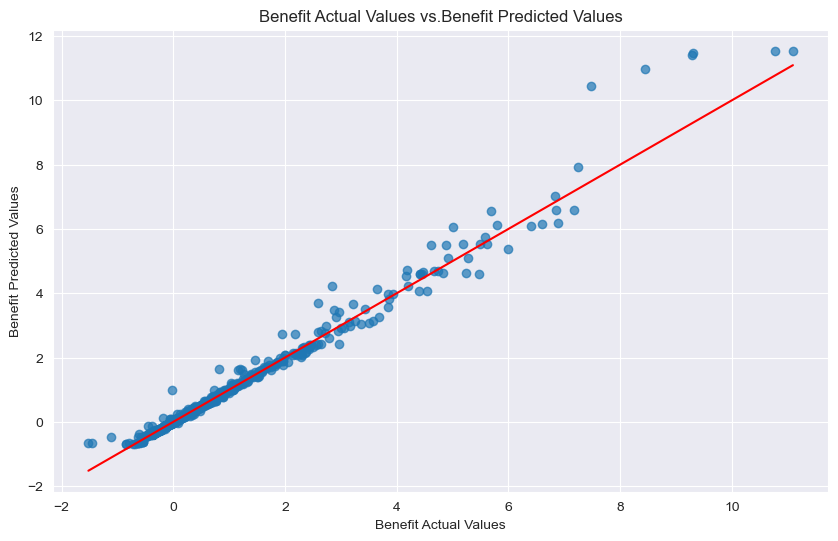

In [143]:
# Plotting 
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Benefit Actual Values')
plt.ylabel('Benefit Predicted Values')
plt.title('Benefit Actual Values vs.Benefit Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')  
plt.show()

worldwide_box_office        0.979802
production_budget           0.015034
international_box_office    0.004972
domestic_box_office         0.000104
genre_numeric               0.000037
userscore                   0.000020
theatre_count               0.000015
metascore                   0.000014
rating_number               0.000002
dtype: float64


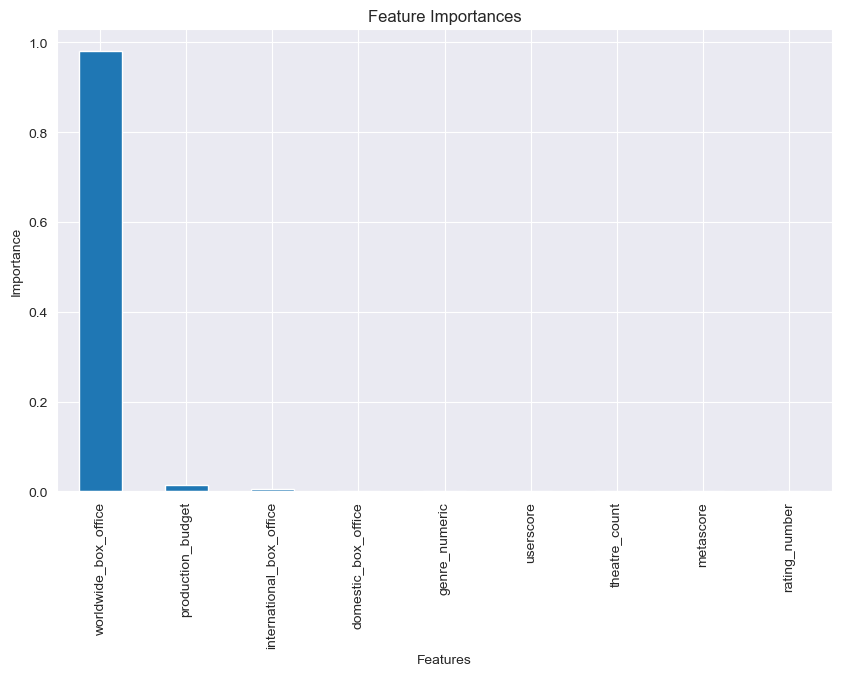

In [144]:
# feature importances with random forest model
feature = random_forest.feature_importances_
features = pd.Series(feature, index=X_train.columns)
features_sorted = features.sort_values(ascending=False)
print(features_sorted)
# Plotting
plt.figure(figsize=(10, 6))
features_sorted.plot(kind='bar')
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

#### Defining a Neural Network Model with an Input Layer, Two Hidden Layers, and a Linear Output Layer






Neural Network 

In [145]:
def create_model(input_shape):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(input_shape,)),  # Adjusted to 7 features
        Dense(32, activation='relu'),
        Dense(1, activation='linear')
    ])
    return model

In [146]:
model = create_model(X_train.shape[1])
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='mean_squared_error',  
              metrics=['mean_squared_error', 'mean_absolute_error'])  


In [147]:
print_loss_callback = LambdaCallback(on_epoch_end=lambda epoch, logs: print(f" Epoch {epoch+1}: Loss = {logs['loss']}"))

In [148]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

#### Training a Neural Network Model with Specified Number of Epochs, Batch Size, Validation Data, Callbacks for Early Stopping and Loss Reporting, with Minimal Verbosity






In [149]:
history = model.fit(X_train, y_train,
                    epochs=1000,  
                    batch_size=35,  
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping, print_loss_callback],  
                    verbose=5)


Epoch 1/1000
 Epoch 1: Loss = 0.19794462621212006
Epoch 2/1000
 Epoch 2: Loss = 0.00814313255250454
Epoch 3/1000
 Epoch 3: Loss = 0.002989483065903187
Epoch 4/1000
 Epoch 4: Loss = 0.0018437792314216495
Epoch 5/1000
 Epoch 5: Loss = 0.001553629757836461
Epoch 6/1000
 Epoch 6: Loss = 0.0012769789900630713
Epoch 7/1000
 Epoch 7: Loss = 0.0011206798953935504
Epoch 8/1000
 Epoch 8: Loss = 0.0009772137273102999
Epoch 9/1000
 Epoch 9: Loss = 0.0009774620411917567
Epoch 10/1000
 Epoch 10: Loss = 0.0008640590240247548
Epoch 11/1000
 Epoch 11: Loss = 0.0007554856711067259
Epoch 12/1000
 Epoch 12: Loss = 0.0007293360540643334
Epoch 13/1000
 Epoch 13: Loss = 0.0006461350130848587
Epoch 14/1000
 Epoch 14: Loss = 0.0005700429319404066
Epoch 15/1000
 Epoch 15: Loss = 0.0005907739396207035
Epoch 16/1000
 Epoch 16: Loss = 0.000538931111805141
Epoch 17/1000
 Epoch 17: Loss = 0.0005904790014028549
Epoch 18/1000
 Epoch 18: Loss = 0.0005678918678313494
Epoch 19/1000
 Epoch 19: Loss = 0.0004340166051406413

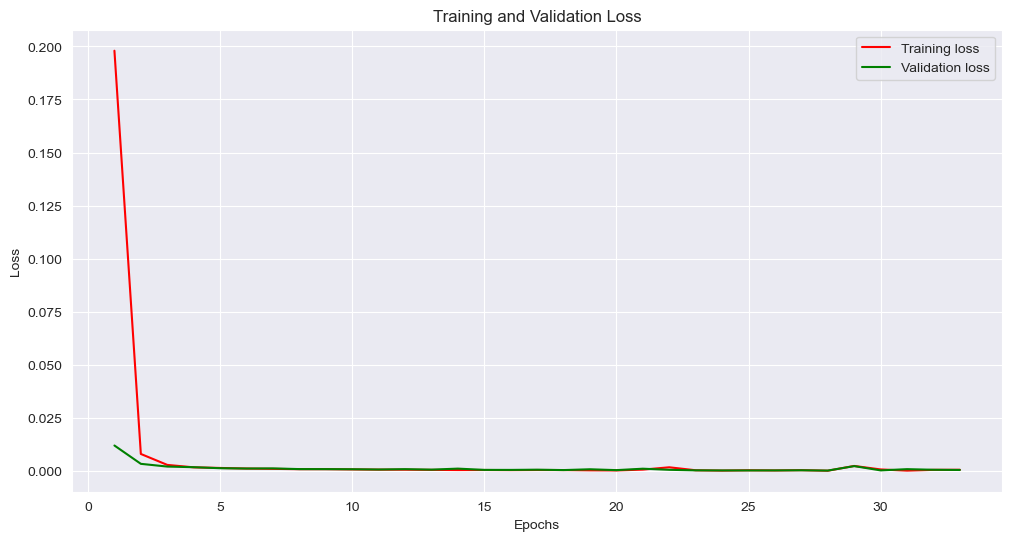

In [150]:
# Plotting the loss function evolution over epochs
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(epochs, loss, 'r-', label='Training loss')
plt.plot(epochs, val_loss, 'g-', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### line graph showing the training and validation loss of a neural network over the course of training epochs. The red line represents the training loss, while the green line represents the validation loss. 
Rapid Decrease in Loss: Both training and validation loss decrease sharply in the initial few epochs, indicating that the model is quickly learning from the data.

Convergence: After the initial epochs, both losses level off, suggesting that the model has largely converged and further training is yielding minimal improvements.

Minimal Overfitting: Since the validation loss remains close to the training loss throughout the training process and does not increase, it suggests that the model is not overfitting significantly to the training data.

Early Stopping: The graph ends at around 30 epochs, which may be due to early stopping, a technique used to prevent overfitting by stopping the training once the validation loss ceases to decrease.


In [151]:
# Evaluation 
predictions = model.predict(X_test).flatten()
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f"Neural Network MAE: {mae}")
print(f"Neural Network R² Score: {r2}")

85/85 [==============================] - 0s 3ms/step
Neural Network MAE: 0.017541153866466177
Neural Network R² Score: 0.999318285531503


#### Evaluating Neural Network Performance with Mean Absolute Error (MAE) and R-squared (R²) Metrics






In [152]:
# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.7)
plt.xlabel('Benefit Actual Values')
plt.ylabel(' Benefit Predicted Values')
plt.title(' Benefit Actual Values vs.  Benefit Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red') 
plt.show()

linear regression, XGboost, Knn

#### Training, Predicting, and Evaluating a Linear Regression Model Using MSE, MAE, and R² Metrics




In [153]:
# Initialize and fit the Linear Regression model
linear = LinearRegression()
linear.fit(X_train, y_train)

# Predictions 
y_pred = linear.predict(X_test)
# Evaluation
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse:.4f}')
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared Score: {r2}")

MSE: 0.0000
Mean Absolute Error (MAE): 3.88482874351326e-16
R-squared Score: 1.0


Knn Regression

#### Optimizing KNN Regressor with Grid Search CV and Evaluating Model Performance






In [154]:
# Initialize the KNN classifier
knn = KNeighborsRegressor()

# Define the grid of parameters to search
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  
    'weights': ['uniform', 'distance'], 
    'metric': ['euclidean', 'manhattan', 'minkowski']  
}
# Initialize the GridSearchCV object with cross-validation
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)
y_pred= grid_search.predict(X_test)
# Evaluation
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse:.4f}')
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared Score: {r2}")

Fitting 5 folds for each of 30 candidates, totalling 150 fits
MSE: 0.0205
Mean Absolute Error (MAE): 0.06890691147269239
R-squared Score: 0.9767378746536833


#### XGboost
#### Tuning XGBoost Regressor with Grid Search CV and Assessing Prediction Accuracy






In [155]:
# Initialize the XGBoost regressor
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror')

# Define the grid of parameters to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'colsample_bytree': [0.3, 0.7],
    'max_depth': [3, 5, 7],
    'eta': [0.01, 0.1, 0.2],  # learning rate
    'subsample': [0.5, 0.7, 1.0]
}
# Initialize the GridSearchCV object with cross-validation
grid_search = GridSearchCV(estimator=xg_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)
y_pred= grid_search.predict(X_test)
# Evaluation
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse:.4f}')
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared Score: {r2}")

Fitting 5 folds for each of 162 candidates, totalling 810 fits
MSE: 0.0021
Mean Absolute Error (MAE): 0.013115136962607783
R-squared Score: 0.9976187365172204


#### using shap method to compare models

#### Using SHAP to Interpret Random Forest Model Predictions with a Summary Bar Plot






In [156]:
#Use SHAP to explain the nn predictions
explainer = shap.TreeExplainer(random_forest)
shap_values = explainer.shap_values(X_test)

#Visualize the SHAP values to interpret the model's behavior
shap.summary_plot(shap_values, X_test, plot_type='bar')

keras is no longer supported, please use tf.keras instead.
Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
You have provided over 5k background samples! For better performance consider using smaller random sample.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


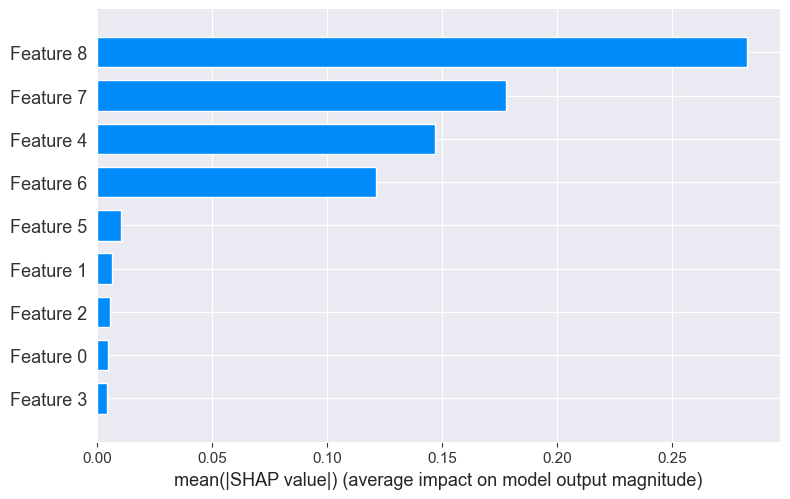

In [157]:
X_train_array = X_train.to_numpy()
X_test_array = X_test.to_numpy()
explainer = shap.DeepExplainer(model, X_train_array)
shap_values = explainer.shap_values(X_test_array)

#Visualize the SHAP values to interpret the model's behavior
shap.summary_plot(shap_values[0], X_test_array, plot_type='bar')

In [ ]:
#X_train_array = X_train.to_numpy()
#X_test_array = X_test.to_numpy()
#def model_predict(X_train_array):
    #return model.predict(X_train_array)

# Sample of the training data to serve as the background distribution
#X_train_sample = shap.sample(X_train, 100)  

# Initialize SHAP's KernelExplainer
#explainer = shap.KernelExplainer(model_predict, X_train_sample)

# Compute SHAP values for the test set
#shap_values = explainer.shap_values(X_test, nsamples=100)   

# Visualize the SHAP values
#shap.summary_plot(shap_values, X_test, plot_type='bar')


In [158]:
#Use SHAP to explain the XGboost predictions
xg_reg.fit(X_train,y_train)
explainer = shap.TreeExplainer(xg_reg)
shap_values = explainer.shap_values(X_test)

#Visualize the SHAP values to interpret the model's behavior
shap.summary_plot(shap_values, X_test, plot_type='bar')

In [ ]:
#X_train_array = X_train.to_numpy()
#X_test_array = X_test.to_numpy()
#knn.fit(X_train_array,y_train)
#def knn_predict(X_train_array):
    #return knn.predict(X_train_array)
#X_train_sample = shap.sample(X_train_array, 100)
#explainer = shap.KernelExplainer(knn_predict, X_train_sample)
#shap_values = explainer.shap_values(X_test_array)

#Visualize the SHAP values to interpret the model's behavior
#shap.summary_plot(shap_values[0], X_test, plot_type='bar')


#### Sub Question - how well the success of a movie, in terms of international box office earning, be predicted based on its pre-realese variables( budget,genre,retings)

In [159]:
# prediction based on budget,genre,ratting
X = pd.DataFrame(scaled_data,columns=['rating_number','genre_numeric','production_budget'])
y = pd.DataFrame(scaled_data,columns=['international_box_office'])

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

In [161]:
# Random Forest Model
random_forest = RandomForestRegressor(n_estimators=100, random_state=42,min_samples_split=2,min_samples_leaf=10,max_depth=10)
random_forest.fit(X_train, y_train.values.ravel())

# Predictions
y_pred = random_forest.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse:.4f}')
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared Score: {r2}")

MSE: 0.2926
Mean Absolute Error (MAE): 0.1951671479945769
R-squared Score: 0.6216533946197398


#### Determining and Displaying Feature Importances from a Random Forest Model






In [162]:
# feature importances with random forest model
feature_importances = random_forest.feature_importances_
important_features = pd.Series(feature_importances, index=X_train.columns)
features_sorted = important_features.sort_values(ascending=False)
print(features_sorted)

production_budget    0.972383
rating_number        0.018281
genre_numeric        0.009336
dtype: float64


#### Sub question - can we predict the audience reception (user score) of a movie based on its genre, budget, and metascore? 

In [163]:
# prediction based on budget,genre, metascore 
X = pd.DataFrame(scaled_data,columns=['rating_number','genre_numeric','metascore'])
y = pd.DataFrame(scaled_data,columns=['userscore'])

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

In [165]:
# Random Forest Model
random_forest = RandomForestRegressor(n_estimators=100, random_state=42,min_samples_split=2,min_samples_leaf=10,max_depth=10)
random_forest.fit(X_train, y_train.values.ravel())

# Predictions
y_pred = random_forest.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse:.4f}')
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared Score: {r2}")

MSE: 0.7451
Mean Absolute Error (MAE): 0.6318753181771531
R-squared Score: 0.2692603894897706


#### Based on the findings, the features are less likely to have effects on the futurey users

In [166]:
# feature importances with random forest model
feature_importances = random_forest.feature_importances_
important_features = pd.Series(feature_importances, index=X_train.columns)
features_sorted = important_features.sort_values(ascending=False)
print(features_sorted)

metascore        0.785869
genre_numeric    0.114709
rating_number    0.099422
dtype: float64


##### 2.Unsupervised learnign problem

In [167]:
#featuure selecting
X = pd.DataFrame(scaled_data,columns=['metascore','userscore','genre_numeric','production_budget','domestic_box_office','worldwide_box_office','international_box_office','benefit'])
X.head()

metascore  userscore  genre_numeric  production_budget  \
0   1.125050   0.910924      -0.907983          -0.474172   
1   0.246751   0.283759      -0.650361          -0.218420   
2   0.363857   0.754133      -0.392738          -0.218420   
3  -0.748655  -0.343406      -0.650361          -0.218420   
4   0.480964   0.126968      -0.650361          -0.218420   

   domestic_box_office  worldwide_box_office  international_box_office  \
0             0.952879              0.411747                  0.090519   
1            -0.381870             -0.354872                 -0.300037   
2            -0.385533             -0.286931                 -0.268262   
3            -0.365655             -0.361927                 -0.308678   
4            -0.385447             -0.361593                 -0.308284   

    benefit  
0  0.615584  
1 -0.363912  
2 -0.283128  
3 -0.372300  
4 -0.371903

#### Cumulative Explained Variance by Components Analysis Using PCA(Principal Component Analysis)






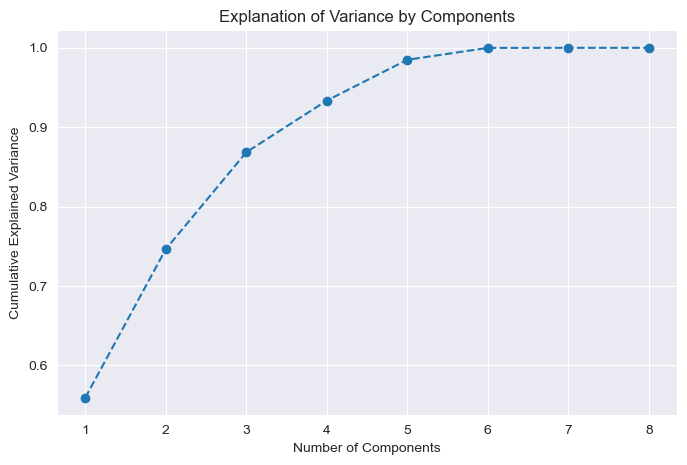

In [168]:
pca = PCA()
X_pca = pca.fit_transform(X)
plt.figure(figsize=(8,5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explanation of Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

#### Based on the plot, the best number of PCA component is 4

In [169]:
pca_final = PCA(n_components=4)
X_pca = pca_final.fit_transform(X)


#### Creating DataFrame for PCA Results






In [170]:
# Creating a DataFrame for the PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2','PCA3','PCA4'])
print(pca_df.head())

       PCA1      PCA2      PCA3      PCA4
0  0.849884 -1.223870 -1.140714  0.318588
1 -0.690358 -0.222760 -0.751429  0.074311
2 -0.599492 -0.682020 -0.636115 -0.202620
3 -0.731939  0.893645 -0.519490 -0.201681
4 -0.704603 -0.281169 -0.723091  0.347857


#### Calculating Inertia and Silhouette Score for Different Numbers of Clusters






In [171]:
inertia = []
silhouette = []
for k in range(2,11):
    km = KMeans(init='k-means++', n_clusters=k, random_state=42, n_init=10, max_iter=300)
    km.fit(X_pca)
    inertia.append(km.inertia_)
    P_score=silhouette_score(X_pca, km.labels_)
    silhouette.append(P_score)

#### Elbow Method and Silhouette Score for Determining Optimal Number of Clusters






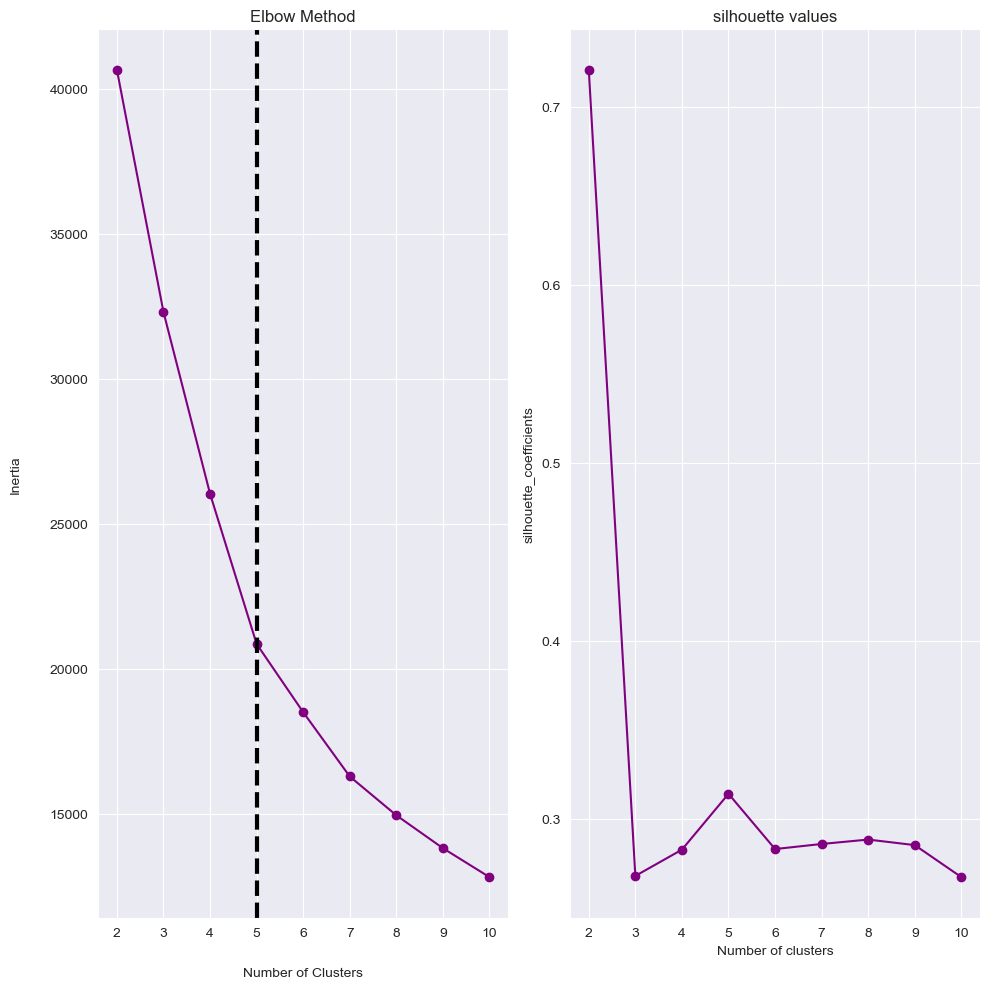

In [172]:
fig,ax=plt.subplots(1,2,figsize=(10,10))
Pkl = KneeLocator(range(2,11), inertia, curve='convex', direction="decreasing")
# draw Elbow
ax[0].plot(range(2,11), inertia,color='purple',marker='o',label='Elbow Method')
ax[0].set_xticks(range(2,11))
ax[0].set_xlabel("Number of Clusters", labelpad=20)
ax[0].set_ylabel("Inertia", labelpad=20)
ax[0].set_title("Elbow Method")
ax[0].axvline(x=Pkl.elbow, color='black', label='axvline-fullheight', ls='--', linewidth=3)
# draw silhouette
ax[1].plot(range(2,11), silhouette,color='purple',marker='o',label='silhouette coefficients')
ax[1].set_xticks(range(2,11))
ax[1].set_title("silhouette values")
ax[1].set_xlabel("Number of clusters")
ax[1].set_ylabel("silhouette_coefficients")
plt.tight_layout();
plt.show()

#### as it is obvious, the optimum number of clusters is 5

#### K-means Clustering with 5 Clusters Applied to PCA-transformed Data






In [173]:
# Apply K-means clustering to the data
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(pca_df)
cluster_labels = kmeans.labels_
pca_df['Cluster'] = cluster_labels
print(pca_df.head())

       PCA1      PCA2      PCA3      PCA4  Cluster
0  0.849884 -1.223870 -1.140714  0.318588        0
1 -0.690358 -0.222760 -0.751429  0.074311        0
2 -0.599492 -0.682020 -0.636115 -0.202620        0
3 -0.731939  0.893645 -0.519490 -0.201681        2
4 -0.704603 -0.281169 -0.723091  0.347857        0


#### Original Dataset with Cluster Labels Merged






In [189]:
# Merging the cluster labels with the original dataset
new_df=pd.DataFrame(df,columns=['metascore','userscore','genre_numeric','production_budget','domestic_box_office','worldwide_box_office','international_box_office','benefit'])
new_df['Cluster'] = pca_df['Cluster']
print(new_df.head())

   metascore  userscore  genre_numeric  production_budget  \
0         76        7.7              0         15000000.0   
1         61        6.9              1         23000000.0   
2         63        7.5              2         23000000.0   
3         44        6.1              1         23000000.0   
4         65        6.7              1         23000000.0   

   domestic_box_office  worldwide_box_office  international_box_office  \
0           72082999.0           108286422.0                36203423.0   
1             203654.0              987640.0                  783986.0   
2               6388.0            10496918.0                 3665654.0   
3            1076829.5                 307.0                     307.0   
4              10983.0               47019.0                   36036.0   

      benefit  Cluster  
0  93286422.0        0  
1 -22012360.0        0  
2 -12503082.0        0  
3 -22999693.0        2  
4 -22952981.0        0  


#### Silhouette Scores Comparison between K-means and DBSCAN Clustering






In [190]:
dbscan = DBSCAN(eps=0.5, min_samples=30)
dbscan_labels = dbscan.fit_predict(X)
# Calculate silhouette scores
silhouette_dbscan = silhouette_score(X, dbscan_labels)
score = silhouette_score(X, kmeans.labels_)
print(dbscan_labels)
print(f"K means Silhouette Score: {score}")
print(f"DBSCAN Silhouette Score: {silhouette_dbscan}")

[-1  0  0 ...  0  0 -1]
K means Silhouette Score: 0.28936335267579893
DBSCAN Silhouette Score: 0.26426905822176844


#### Visualization of K-means and DBSCAN Clustering Results

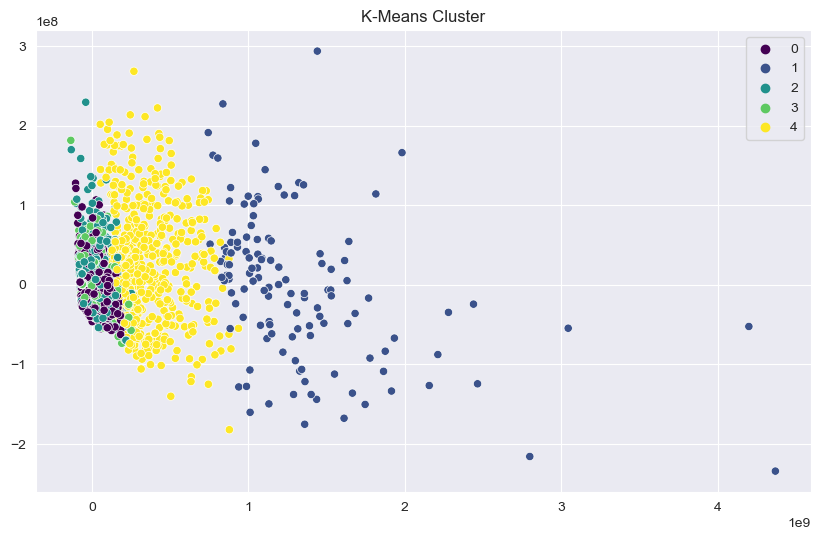

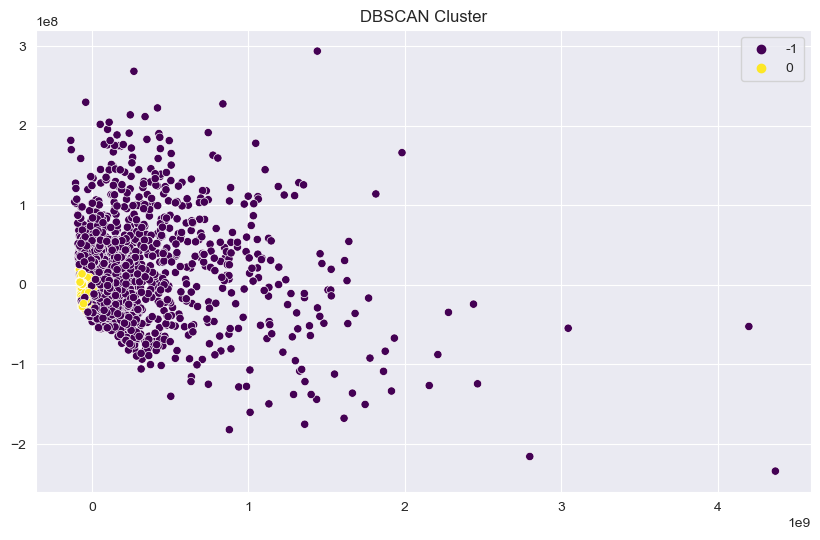

In [191]:
# Visualization of the clustering
def plot(X, labels, title):
    pca = PCA(n_components=2).fit_transform(new_df)  
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=pca[:, 0], y=pca[:, 1], hue=labels, palette="viridis")
    plt.title(title)
    plt.show()

plot(new_df, kmeans.labels_, "K-Means Cluster")
plot(new_df, dbscan_labels, "DBSCAN Cluster")

#### Decoding Numeric Genre Values to Original Genre Strings

In [177]:
# Creating a reverse mapping from numeric values back to genres
reverse_genre_mapping = {index: genre for genre, index in primary_genre_mapping.items()}
# Apply the reverse mapping to decode the numeric genre back to the original genre string
new_df['decoded_genre'] = new_df['genre_numeric'].map(reverse_genre_mapping)
new_df=pd.DataFrame(new_df,columns=['decoded_genre','metascore','userscore','genre_numeric','production_budget','domestic_box_office','worldwide_box_office','international_box_office','benefit','Cluster'])
new_df.head(20)

decoded_genre  metascore  userscore  genre_numeric  production_budget  \
0         Action         76        7.7              0         15000000.0   
1          Drama         61        6.9              1         23000000.0   
2         Horror         63        7.5              2         23000000.0   
3          Drama         44        6.1              1         23000000.0   
4          Drama         65        6.7              1         23000000.0   
5         Comedy         35        5.1              3         85000000.0   
6          Drama         36        6.7              1          8000000.0   
7          Drama         72        7.4              1         23000000.0   
8       Thriller         63        5.8              4         23000000.0   
9        History         44        6.6              5         23000000.0   
10        Action         38        5.0              0         20000000.0   
11        Action         54        6.3              0         35000000.0   
12     Biography         96        8.0              6         20000000.0   
13     Adventure         82        8.1              7         18000000.0   
14         Drama         29        5.0              1         23000000.0   
15        Action         48        7.0              0         50000000.0   
16     Biography         58        6.9              6         23000000.0   
17      Thriller         44        6.7              4          4000000.0   
18         Drama         61        7.4              1         23000000.0   
19         Crime         83        7.7              8         23000000.0   

    domestic_box_office  worldwide_box_office  international_box_office  \
0            72082999.0           108286422.0                36203423.0   
1              203654.0              987640.0                  783986.0   
2                6388.0            10496918.0                 3665654.0   
3             1076829.5                 307.0                     307.0   
4               10983.0               47019.0                   36036.0   
5            66941559.0            10496918.0                 3665654.0   
6               54702.0              143782.0                   89080.0   
7              125120.0             4581361.0                 4456241.0   
8                6820.0            10496918.0                 3665654.0   
9             3688723.0             3712409.0                   23686.0   
10           12234694.0            17306648.0                 5071954.0   
11           45819713.0            71118378.0                25298665.0   
12           56671993.0           180765061.0               124093068.0   
13           18335230.0            60217171.0                41881941.0   
14            1076829.5             3317662.0                 3317662.0   
15           52853219.0            69411370.0                16558151.0   
16            1076829.5               21768.0                   21768.0   
17               9134.0               47552.0                   38418.0   
18             121390.0            10496918.0                 3665654.0   
19            1076829.5                 566.0                     566.0   

        benefit  Cluster  
0    93286422.0        0  
1   -22012360.0        0  
2   -12503082.0        0  
3   -22999693.0        2  
4   -22952981.0        0  
5   -74503082.0        2  
6    -7856218.0        2  
7   -18418639.0        0  
8   -12503082.0        0  
9   -19287591.0        2  
10   -2693352.0        2  
11   36118378.0        0  
12  160765061.0        3  
13   42217171.0        3  
14  -19682338.0        2  
15   19411370.0        0  
16  -22978232.0        3  
17   -3952448.0        0  
18  -12503082.0        0  
19  -22999434.0        3

**sub question - What distinct clusters of movies can be identified based on box office earnings?**

#### Visualization of Clusters Based on Worldwide Box Office Revenue

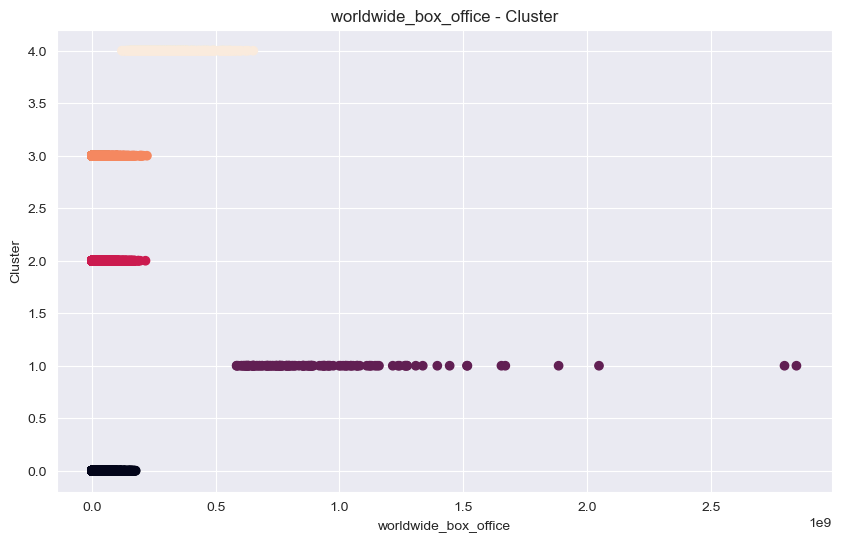

In [178]:
# Visualize Clusters
plt.figure(figsize=(10, 6))
plt.scatter(new_df['worldwide_box_office'], new_df['Cluster'], c=kmeans.labels_)
plt.title('worldwide_box_office - Cluster')
plt.xlabel('worldwide_box_office')
plt.ylabel('Cluster')
plt.show()

# Pairplot of Features vs Cluster

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN be

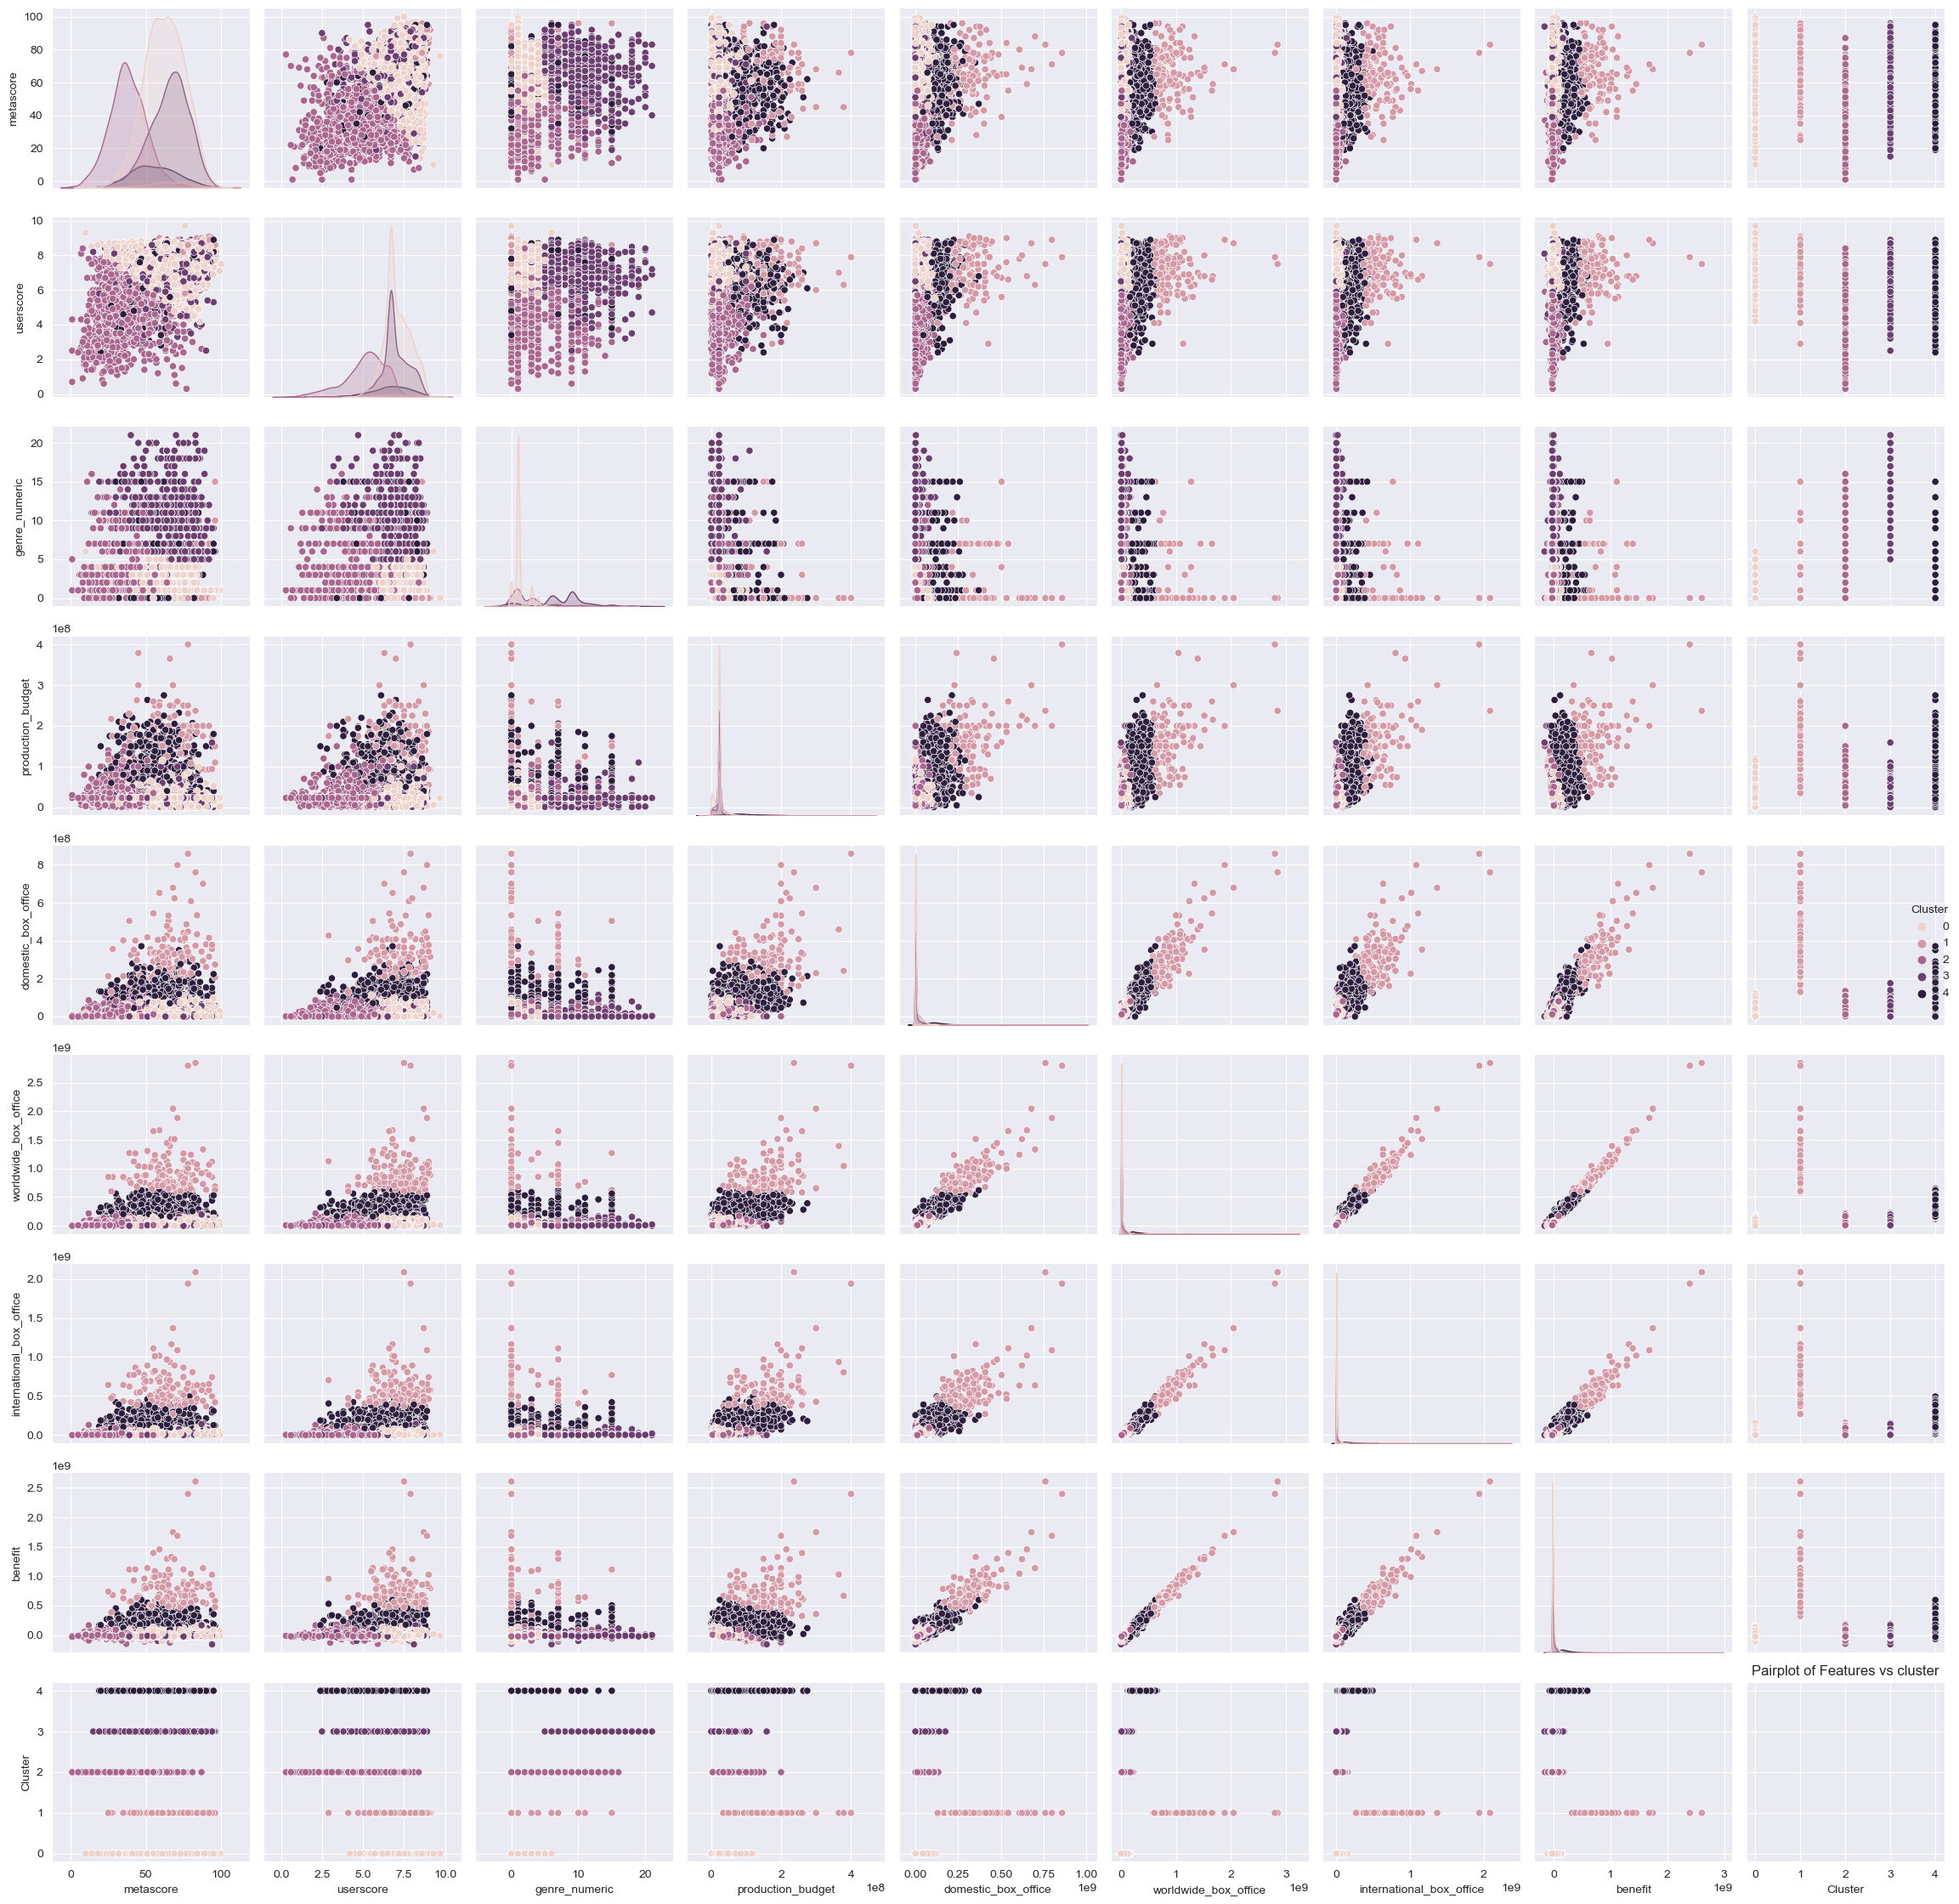

In [179]:
# visualization 
sns.pairplot(new_df, hue='Cluster', vars=new_df.select_dtypes(include='number').columns)
plt.title('Pairplot of Features vs cluster')
plt.tight_layout();
plt.show()

#### Sub question - how do clusters of movies with high box office earnings differ in their characteristics from those with lower earnings?

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN be

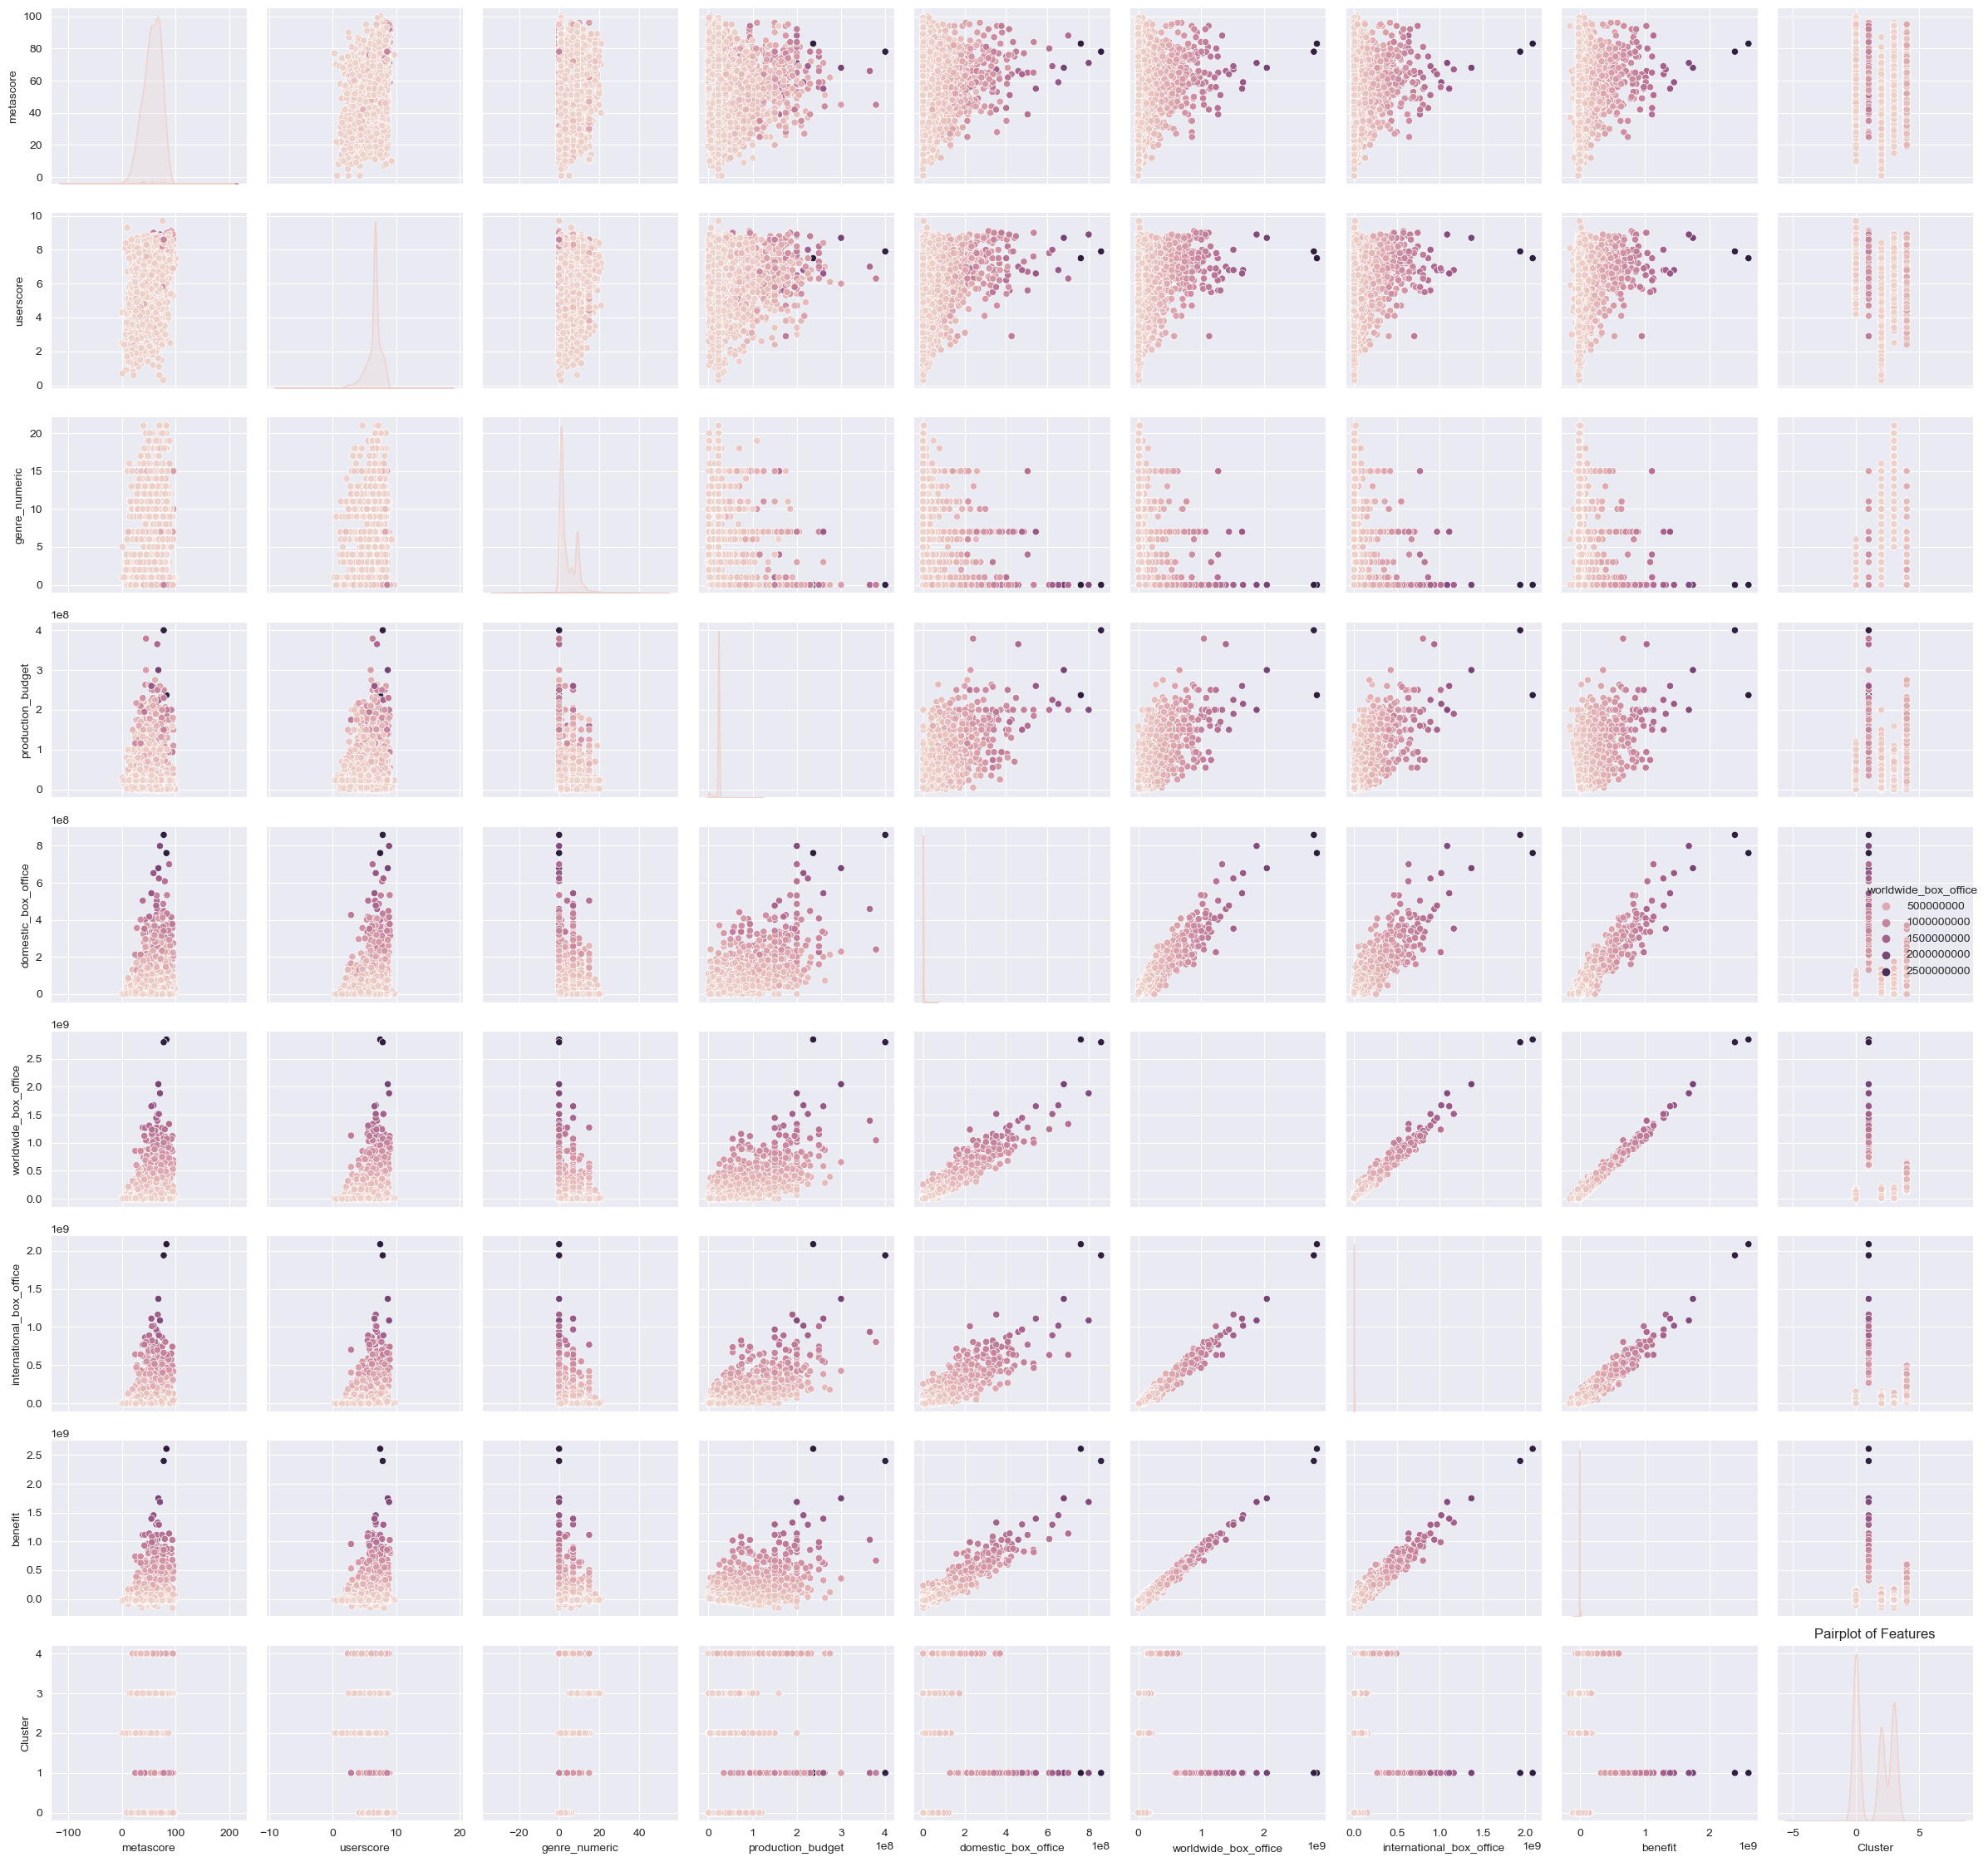

In [180]:
# Perform the visualization
sns.pairplot(new_df, hue='worldwide_box_office', vars=new_df.select_dtypes(include='number').columns)
plt.title('Pairplot of Features')
plt.tight_layout();
plt.show()

# Conclusion

#### Supervised Learning Analysis Conclusions:
Key Predictors Identified: The analysis through random forest and neural network models highlighted that genre, budget, ratings, and critical reception (metascore) are significant predictors of a movie's financial success and audience reception. This finding underscores the importance of these variables in forecasting box office earnings and audience scores.

Predictive Power of Models: The models demonstrated a robust ability to predict the success of a movie based on pre-release variables. Specifically, the analysis showed that a combination of budget, genre, and ratings could explain a significant portion of the variance in international box office earnings, with these factors accounting for nearly 62% of the influence on sales.

Audience Reception Predictability: The analysis also revealed that predicting audience reception (userscore) based on genre, budget, and critical reception is challenging, yet there's a quantifiable chance (around 25%) of making accurate predictions. This suggests that while these factors are influential, audience reception may also be affected by other, less quantifiable aspects.

#### Unsupervised Learning Analysis Conclusions:
Market Segmentation: Clustering analysis successfully segmented movies into distinct groups based on their characteristics, such as box office earnings, genre, ratings, and budget. This segmentation provides a nuanced understanding of the market, revealing specific niches and preferences that can inform targeted marketing and development strategies.

Characteristics of High Earning Movies: The analysis identified clear differences between clusters of high and low-earning movies. High box office earners typically had higher user and critic scores, larger budgets, and belonged to genres such as Action, Adventure, and Fantasy. This indicates that investment in quality (as perceived by both critics and audiences) and in genres with broad appeal is correlated with financial success.

Effectiveness of Clustering Models: The comparison between K-means and DBSCAN clustering methods concluded that K-means was slightly more suitable for this particular analysis. This finding suggests that for the purpose of identifying distinct groups within movies based on the specified features, K-means provided a more effective segmentation.

# Overall Conclusion:
The supervised learning models (random forest and neural network) proved effective in identifying key predictors of a movie's success and in making accurate predictions about box office earnings and audience reception. The unsupervised learning (clustering) provided deep insights into the market dynamics by segmenting movies into distinct clusters based on their financial and critical performance. These analyses collectively offer valuable perspectives for stakeholders in the film industry, from predicting the success of future projects to understanding market trends and audience preferences. The findings can guide strategic decision-making in movie production, marketing, and distribution to maximize both financial success and audience satisfaction.